In [1]:
import numpy as np
from starfish.plot import *
from starfish.galaxy.power import P_lin_w0wacdm

In [2]:
from starfish.set import settings
settings.cosmo_value

[0.32, 0.049, 0.67, 0.96, 0.81, 0.06, 3.044, -0.758, -0.82]

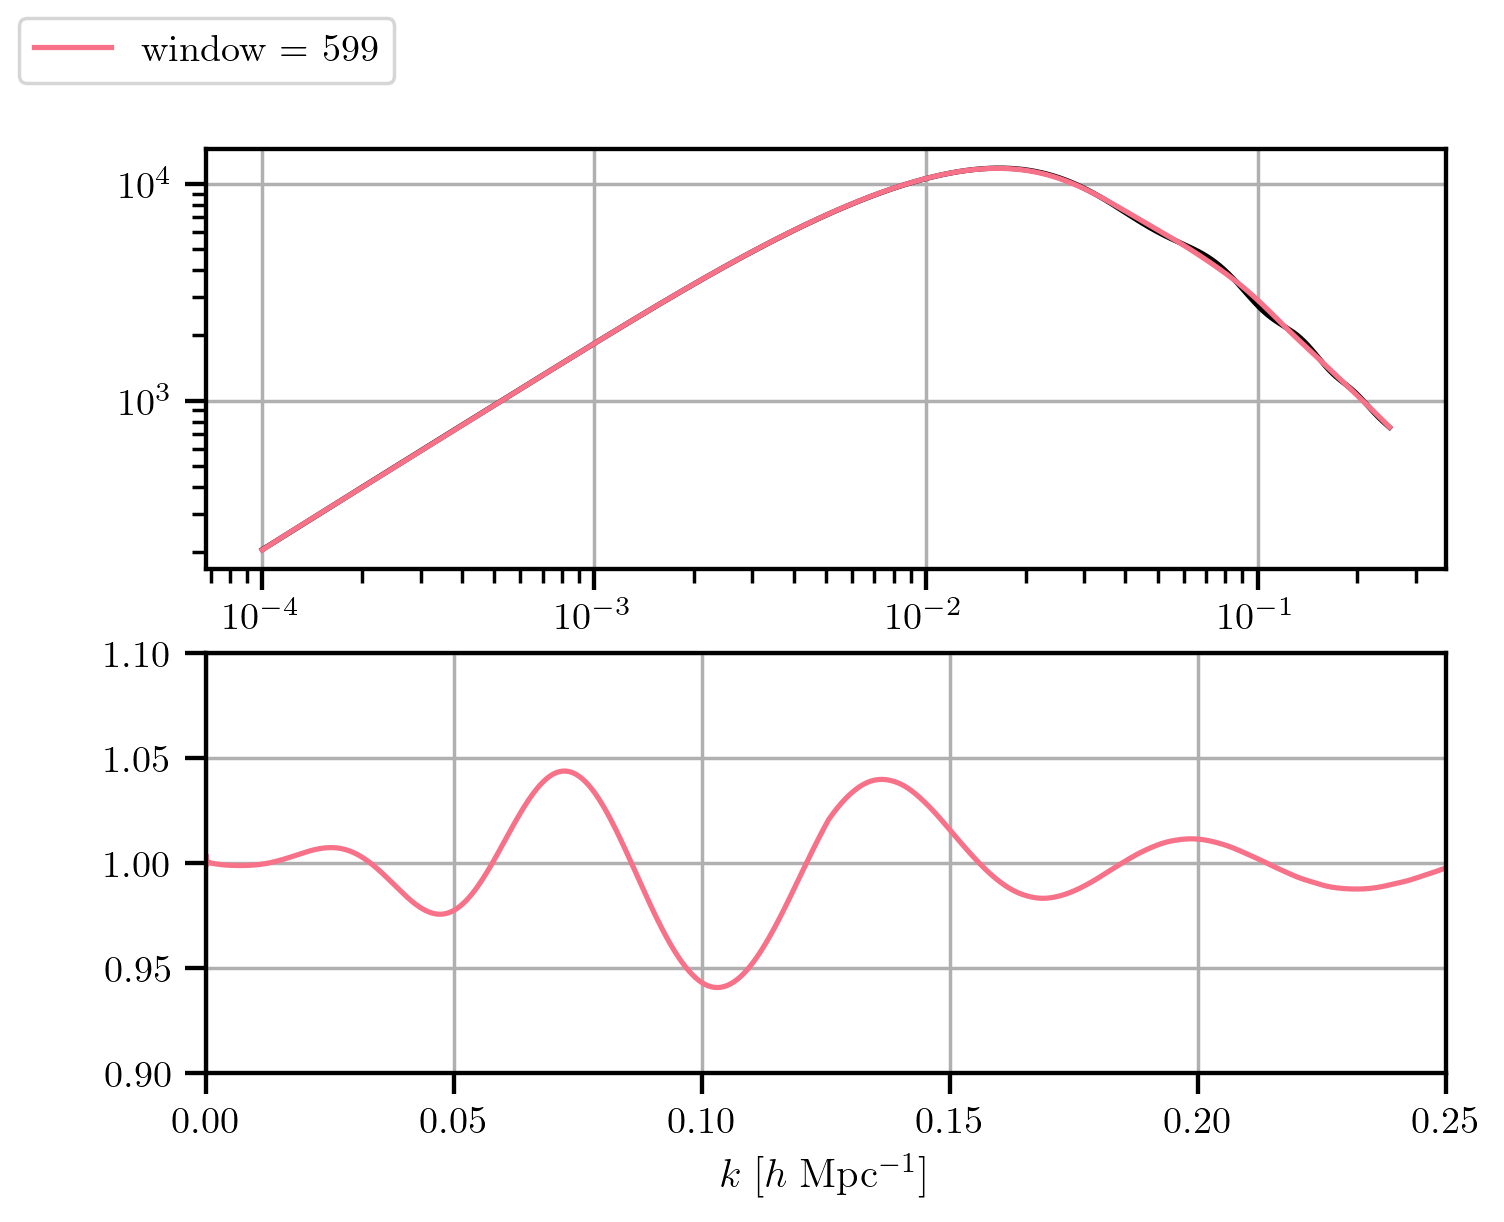

In [3]:
pars,res,PK=P_lin_w0wacdm(*settings.cosmo_value)
check_wiggle(PK,window_array=settings.window_len)

In [4]:
from starfish.galaxy.fisher import get_Fisher
fisher=get_Fisher(lcdm=False)

process started!
fiducial biases and volumes:
(z = 0.7)
-- b_fid: 1.18
-- V_fid: 5.07e+08
(z = 0.9)
-- b_fid: 1.26
-- V_fid: 6.72e+08
(z = 1.1)
-- b_fid: 1.34
-- V_fid: 8.09e+08
(z = 1.3)
-- b_fid: 1.42
-- V_fid: 9.16e+08
(z = 1.5)
-- b_fid: 1.50
-- V_fid: 9.95e+08
(z = 1.8)
-- b_fid: 1.62
-- V_fid: 2.14e+09
(z = 2.2)
-- b_fid: 1.78
-- V_fid: 2.23e+09
fiducial values:
-- omega_m0: 0.3200000900104817
-- omega_b0: 0.049
--        h: 0.67
--      n_s: 0.96
--  sigma_8: 0.8099999999999995
--     m_nu: 0.06000375968353048
--    N_eff: 3.0440000000000005
--       w0: -0.758
--       wa: -0.82
--     p_s1: 0.0
--     p_s2: 0.0
--     p_s3: 0.0
--     p_s4: 0.0
--     p_s5: 0.0
--     p_s6: 0.0
--     p_s7: 0.0
--    lnbs1: -0.39555186315765445
--    lnbs2: -0.42249551948035735
--    lnbs3: -0.4484129222413949
--    lnbs4: -0.47276417743997756
--    lnbs5: -0.4953225129962548
--    lnbs6: -0.5257525868145939
--    lnbs7: -0.5604684135126254
calculating fiducial H(z), DA(z) and f(z,k)...  done!

In [5]:
import pandas as pd
cov=pd.DataFrame(np.linalg.inv(fisher.values),index=fisher.index,columns=fisher.columns)

In [6]:
name_width=max([len(v) for v in settings.var_name])
error_dict=dict(zip(settings.var_name,np.sqrt(np.diag(cov.values))))
print('1-sigma errors:')
for key in error_dict.keys():
    print(f'-- {key.rjust(name_width)}: {error_dict[key]:.1e}')

1-sigma errors:
-- omega_m0: 5.2e-02
-- omega_b0: 1.1e-02
--        h: 4.7e-02
--      n_s: 1.1e-01
--  sigma_8: 1.1e-01
--     m_nu: 8.2e-01
--    N_eff: 2.5e+00
--       w0: 3.7e-01
--       wa: 1.3e+00
--     p_s1: 7.0e+01
--     p_s2: 4.9e+01
--     p_s3: 4.4e+01
--     p_s4: 4.0e+01
--     p_s5: 4.0e+01
--     p_s6: 3.9e+01
--     p_s7: 3.8e+01
--    lnbs1: 1.1e-01
--    lnbs2: 1.0e-01
--    lnbs3: 1.0e-01
--    lnbs4: 1.0e-01
--    lnbs5: 1.0e-01
--    lnbs6: 1.0e-01
--    lnbs7: 1.0e-01


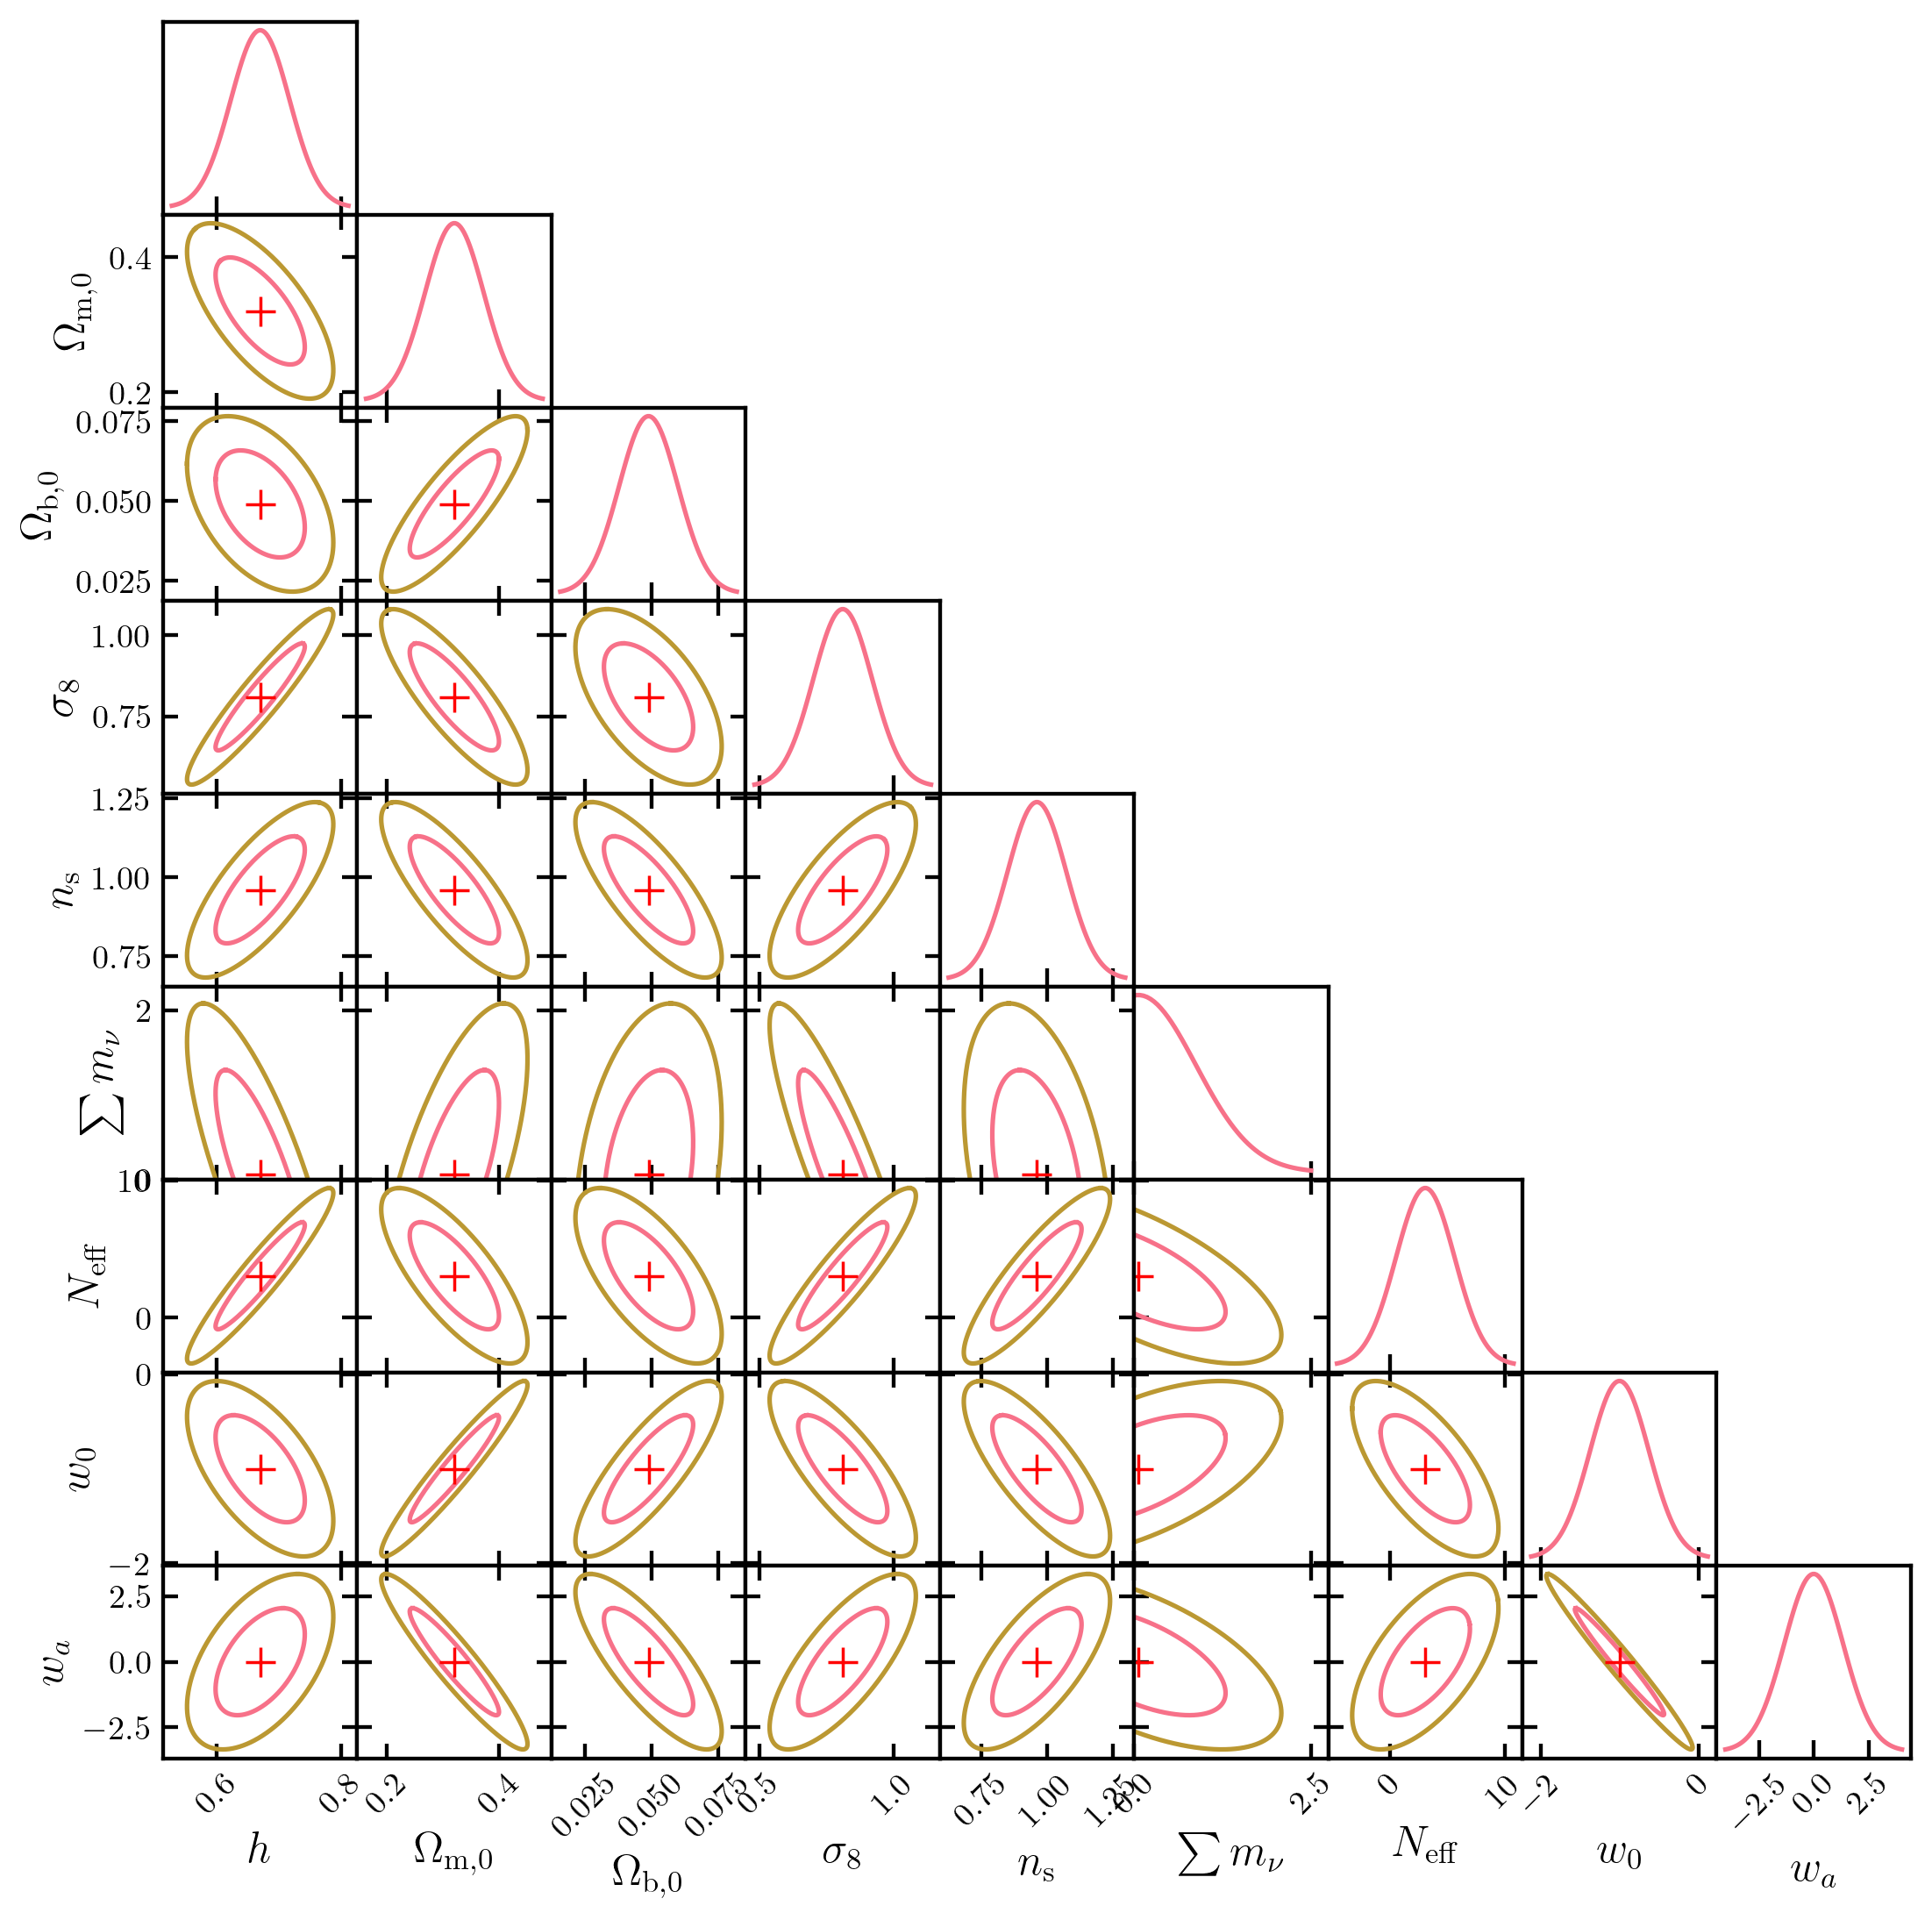

In [7]:
fig=get_figure(cov.values,['h','omega_m0','omega_b0','sigma_8','n_s','m_nu','N_eff','w0','wa'])